In [2]:
from keras import layers, models
import numpy as np

2024-06-11 14:36:09.792980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 14:36:10.314967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-11 14:36:10.315040: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-11 14:36:10.381506: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-11 14:36:11.610902: W tensorflow/stream_executor/platform/de

In [3]:
from keras.datasets import imdb

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [5]:
def vectorization(data : any, dim : int  = 10000) -> any:
    res = np.zeros(shape = (len(data), dim))
    for i in range(len(data)):
        for j in data[i]:
            res[i, j] = 1
    return res

In [6]:
train_data = vectorization(x_train)

In [7]:
test_data = vectorization(x_test)

In [8]:
train_data.shape

(25000, 10000)

In [9]:
def build_2_16_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(
        loss = 'binary_crossentropy',
        metrics = ['acc'],
        optimizer = 'rmsprop'
    )
    return model

In [10]:
def build_2_4_model():
    model = models.Sequential()
    model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(4, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(
        loss = 'binary_crossentropy',
        metrics = ['acc'],
        optimizer = 'rmsprop'
    )
    return model

In [11]:
model_big = build_2_16_model()

2024-06-11 14:36:18.785188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-11 14:36:18.785475: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-11 14:36:18.785495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mukesh-ThinkPad-E14): /proc/driver/nvidia/version does not exist
2024-06-11 14:36:18.786113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model_small = build_2_4_model()

In [13]:
big_model_history = model_big.fit(
    train_data,
    y_train,
    epochs = 20,
    validation_split = 0.2,
    batch_size = 64
)

Epoch 1/20


2024-06-11 14:36:19.200834: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 800000000 exceeds 10% of free system memory.


303/313 [============================>.] - ETA: 0s - loss: 0.3450 - acc: 0.8607

2024-06-11 14:36:21.274253: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 200000000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.3424 - acc: 0.8619 - val_loss: 0.2776 - val_acc: 0.8882
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.2039 - acc: 0.9205 - val_loss: 0.2868 - val_acc: 0.8864
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1614 - acc: 0.9409 - val_loss: 0.3210 - val_acc: 0.8838
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1330 - acc: 0.9516 - val_loss: 0.3444 - val_acc: 0.8824
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1114 - acc: 0.9588 - val_loss: 0.3999 - val_acc: 0.8752
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0898 - acc: 0.9678 - val_loss: 0.4535 - val_acc: 0.8750
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - acc: 0.9746 - val_loss: 0.5161 - val_acc: 0.8746
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0580 - acc:

In [14]:
small_model_history = model_small.fit(
    train_data,
    y_train,
    validation_split  = 0.2,
    epochs = 20,
    batch_size = 64
)

2024-06-11 14:36:42.657246: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 800000000 exceeds 10% of free system memory.


Epoch 1/20
304/313 [============================>.] - ETA: 0s - loss: 0.4375 - acc: 0.8412

2024-06-11 14:36:48.097155: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 200000000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.4333 - acc: 0.8426 - val_loss: 0.3016 - val_acc: 0.8812
Epoch 2/20
313/313 [==============================] - 1s 5ms/step - loss: 0.2340 - acc: 0.9110 - val_loss: 0.2691 - val_acc: 0.8926
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1852 - acc: 0.9309 - val_loss: 0.2754 - val_acc: 0.8926
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1603 - acc: 0.9423 - val_loss: 0.2871 - val_acc: 0.8910
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1421 - acc: 0.9498 - val_loss: 0.3062 - val_acc: 0.8912
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1275 - acc: 0.9554 - val_loss: 0.3264 - val_acc: 0.8894
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1153 - acc: 0.9593 - val_loss: 0.3483 - val_acc: 0.8848
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1047 - acc:

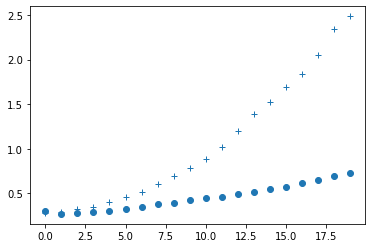

In [15]:
## plot validation data of the model
import matplotlib.pyplot as plt

plt.plot(range(len(big_model_history.history['val_loss'])), big_model_history.history['val_loss'], '+',label = 'Big Model')
plt.scatter(range(len(small_model_history.history['val_loss'])), small_model_history.history['val_loss'],label = 'Small Model')


In [16]:
def get_bigger_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'rmsprop',
        metrics = ['acc']
    )
    return model

In [17]:
bigger_model = get_bigger_model()

In [18]:
bigger_model_history = bigger_model.fit(
    train_data,
    y_train,
    epochs = 20,
    batch_size = 64,
    validation_split = 0.2
)

Epoch 1/20


2024-06-11 14:37:10.616022: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 800000000 exceeds 10% of free system memory.


313/313 [==============================] - 18s 56ms/step - loss: 0.3507 - acc: 0.8519 - val_loss: 0.3042 - val_acc: 0.8770
Epoch 2/20
313/313 [==============================] - 17s 56ms/step - loss: 0.1805 - acc: 0.9351 - val_loss: 0.3327 - val_acc: 0.8858
Epoch 3/20
313/313 [==============================] - 17s 56ms/step - loss: 0.0937 - acc: 0.9702 - val_loss: 0.4344 - val_acc: 0.8778
Epoch 4/20
313/313 [==============================] - 17s 56ms/step - loss: 0.0427 - acc: 0.9901 - val_loss: 0.8272 - val_acc: 0.8816
Epoch 5/20
313/313 [==============================] - 17s 55ms/step - loss: 0.0176 - acc: 0.9963 - val_loss: 1.1326 - val_acc: 0.8756
Epoch 6/20
313/313 [==============================] - 17s 56ms/step - loss: 0.0059 - acc: 0.9988 - val_loss: 2.1505 - val_acc: 0.8828
Epoch 7/20
313/313 [==============================] - 18s 57ms/step - loss: 0.0048 - acc: 0.9995 - val_loss: 2.7288 - val_acc: 0.8800
Epoch 8/20
313/313 [==============================] - 19s 60ms/step - los

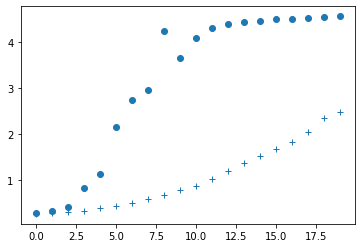

In [19]:
plt.plot(range(len(big_model_history.history['val_loss'])), big_model_history.history['val_loss'], '+',label = 'Big Model')
plt.scatter(range(len(bigger_model_history.history['val_loss'])), bigger_model_history.history['val_loss'],label = 'Small Model')


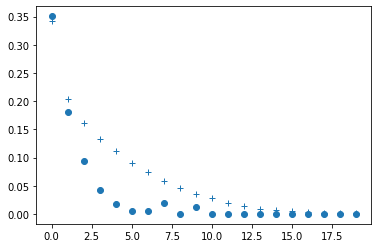

In [20]:
plt.plot(range(len(big_model_history.history['loss'])), big_model_history.history['loss'], '+',label = 'Big Model')
plt.scatter(range(len(bigger_model_history.history['loss'])), bigger_model_history.history['loss'],label = 'Small Model')


In [21]:
### Experimenting with regularizers

In [22]:
from keras import regularizers

In [23]:
def get_regularized_network():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), input_shape = (10000,)))
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(
        optimizer = 'rmsprop',
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    return model

In [24]:
regularized_model = get_regularized_network()

In [25]:
regularized_model_history = regularized_model.fit(train_data, y_train, epochs = 20, batch_size = 64, validation_split = 0.2)

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 0.3702 - acc: 0.8655 - val_loss: 0.3288 - val_acc: 0.8824
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2807 - acc: 0.9071 - val_loss: 0.3630 - val_acc: 0.8696
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2644 - acc: 0.9144 - val_loss: 0.3329 - val_acc: 0.8812
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2497 - acc: 0.9184 - val_loss: 0.3336 - val_acc: 0.8772
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2362 - acc: 0.9221 - val_loss: 0.3276 - val_acc: 0.8822
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2255 - acc: 0.9257 - val_loss: 0.3574 - val_acc: 0.8766
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2128 - acc: 0.9302 - val_loss: 0.3982 - val_acc: 0.8624
Epoch 8/20
313/313 [==============================] - 1s 4ms/step - loss: 0.

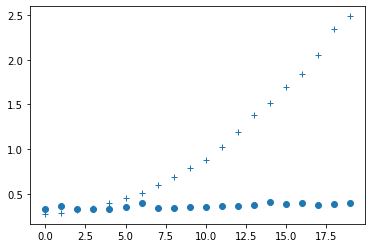

In [28]:
plt.plot(range(len(big_model_history.history['val_loss'])), big_model_history.history['val_loss'], '+',label = 'Big Model')
plt.scatter(range(len(regularized_model_history.history['val_loss'])), regularized_model_history.history['val_loss'],label = 'Small Model')
